In [243]:
import yfinance as yf
import numpy as np
import scipy as sp
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from statsmodels.tsa.stattools import adfuller, kpss, acf, acovf, pacf


from statsmodels.stats.diagnostic import acorr_ljungbox, het_arch
from statsmodels.tools.eval_measures import rmse, meanabs

import seaborn as sns
from statsmodels.stats.diagnostic import het_arch
from sklearn.metrics import mean_squared_error, mean_absolute_error
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

In [251]:
tickers = ['NVDA']
data = yf.download(tickers, start="2020-01-01", end="2024-11-21") 
data.index = pd.to_datetime(data.index)

[*********************100%%**********************]  1 of 1 completed


In [252]:
data.head()
print(data.columns)

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


In [253]:
douns = data[['Adj Close']]
douns.head()

,Adj Close
Date,
2020-01-02,5.973122
2020-01-03,5.877517
2020-01-06,5.902165
2020-01-07,5.973620
2020-01-08,5.984824


In [255]:
print(douns.columns)

Index(['Adj Close'], dtype='object')


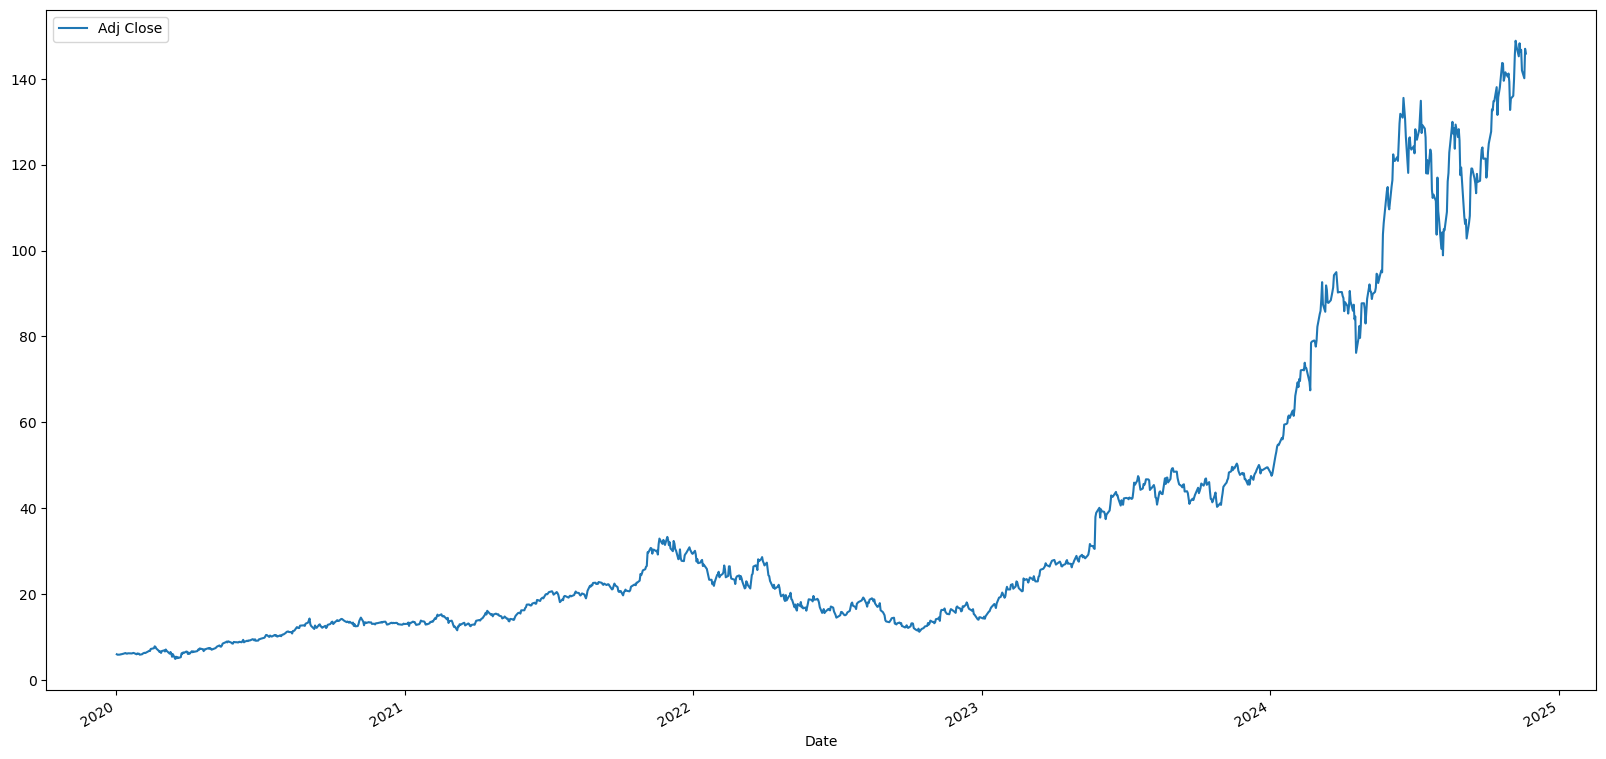

In [256]:
# graphique 1
plt.rcParams['figure.figsize'] = (20,10)
douns.plot()
plt.show()

In [257]:
douns_2 = douns[[('Adj Close')]]
douns_2.head()

,Adj Close
Date,
2020-01-02,5.973122
2020-01-03,5.877517
2020-01-06,5.902165
2020-01-07,5.973620
2020-01-08,5.984824


In [258]:
douns_3 = douns[[('Adj Close', 'AAPL')]]
douns_3.head()

KeyError: "None of [Index([('Adj Close', 'AAPL')], dtype='object')] are in the [columns]"

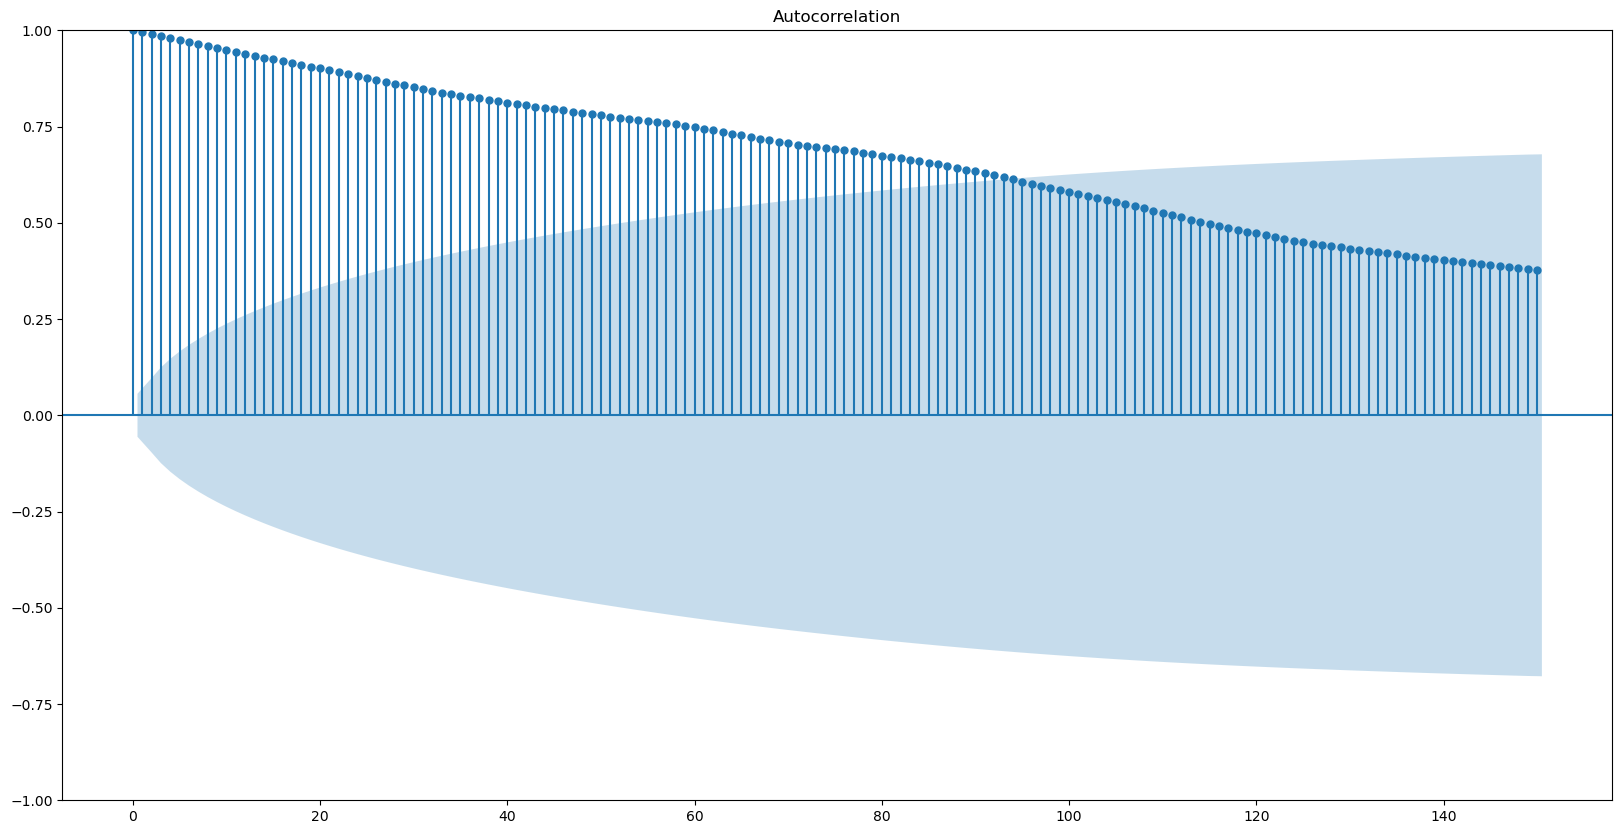

In [259]:
plt.rcParams['figure.figsize'] = (20,10)

plot_acf(douns_2[('Adj Close')], lags=150)
plt.show()

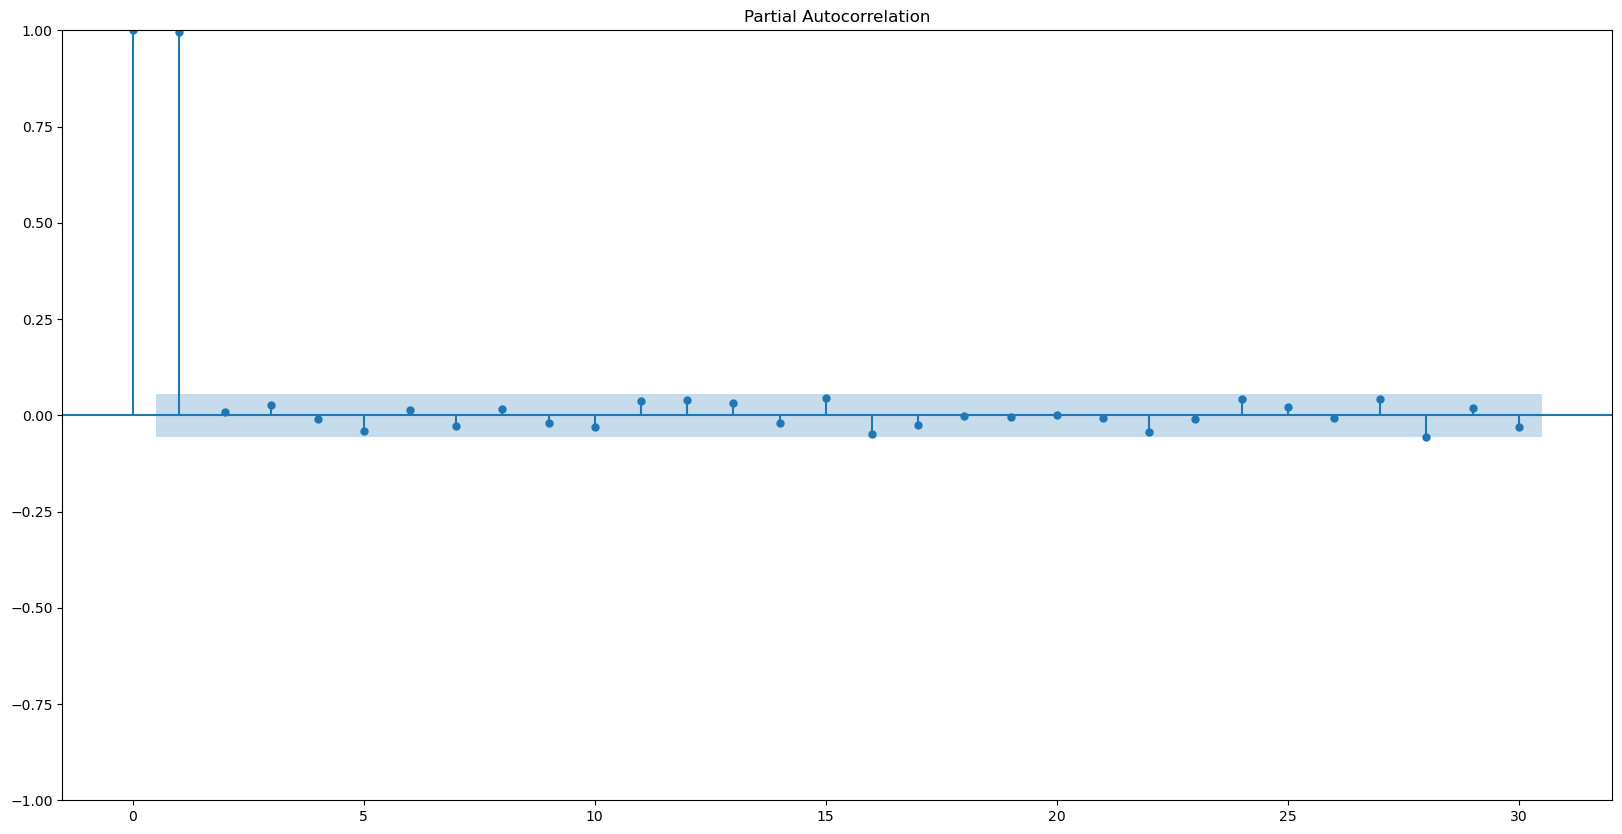

In [260]:
plt.rcParams['figure.figsize'] = (20,10)

plot_pacf(douns_2[('Adj Close')], lags=30)
plt.show()

In [261]:
from statsmodels.tsa.stattools import adfuller

In [262]:
adf1 = adfuller(douns_2[('Adj Close')], regression='ct', autolag='AIC', regresults=True)
adf1[3].resols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.077
Method:                 Least Squares   F-statistic:                     5.375
Date:                Fri, 22 Nov 2024   Prob (F-statistic):           7.37e-15
Time:                        23:33:57   Log-Likelihood:                -2277.5
No. Observations:                1209   AIC:                             4603.
Df Residuals:                    1185   BIC:                             4725.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0001      0.002      0.047      0.962      -0.004       0.005
x2            -0.0753      0.029     -2.590      0.010      -0.132      -0.018
x3             0.0888      0.029      3.021      0.003       0.031       0.146
x4            -0.0221      0.030     -0.748      0.455      -0.080       0.036
x5            -0.0190      0.030     -0.640      0.523      -0.077       0.039
x6            -0.0647      0.030     -2.175      0.030      -0.123      -0.006
x7             0.0486      0.030      1.633      0.103      -0.010       0.107
x8             0.0118      0.030      0.398      0.691      -0.046       0.070
x9             0.0013      0.029      0.046      0.963      -0.056       0.059
x10            0.0852      0.029      2.916      0.004       0.028       0.143
x11           -0.0813      0.029     -2.770      0.006      -0.139      -0.024
x12           -0.0670      0.029     -2.276      0.023      -0.125      -0.009
x13            0.0064      0.029      0.218      0.828      -0.051       0.064
x14            0.1099      0.029      3.738      0.000       0.052       0.168
x15           -0.1516      0.030     -5.127      0.000      -0.210      -0.094
x16           -0.0765      0.030     -2.529      0.012      -0.136      -0.017
x17            0.0684      0.030      2.257      0.024       0.009       0.128
x18            0.0180      0.030      0.595      0.552      -0.041       0.077
x19           -0.0518      0.030     -1.707      0.088      -0.111       0.008
x20            0.0093      0.030      0.306      0.759      -0.050       0.069
x21            0.0484      0.030      1.599      0.110      -0.011       0.108
x22            0.0921      0.030      3.042      0.002       0.033       0.151
const         -0.0773      0.097     -0.800      0.424      -0.267       0.112
x23            0.0003      0.000      1.414      0.158      -0.000       0.001
==============================================================================
Omnibus:                      235.009   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6010.225
Skew:                           0.081   Prob(JB):                         0.00
Kurtosis:                      13.922   Cond. No.                     1.46e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.46e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>



- Valeurs critiques de la constante et de la tendance dans le test de Dickey-Fuller

<table>
    <col width="50">
    <col width="70">
    <col width="70">
    <col width="70">
    <col width="70">
    <col width="70">
    <col width="70">
    <col width="70">
    <col width="70">
    <col width="70">
    <tr>
        <td colspan="1" style="text-align: center;border-right: 2px solid black"></td>
        <td colspan="3" style="text-align: center;border-right: 2px solid black"><i>Modèle [2]</i></td>
        <td colspan="6" style="text-align: center;border-right: 2px solid black"><i>Modèle [1]</i></td>
    </tr>
    <tr>
        <td colspan="1" style="text-align: center;border-right: 2px solid black"></td>
        <td colspan="3" style="text-align: center;border-right: 2px solid black">Constante</td>
        <td colspan="3" style="text-align: center;border-right: 2px solid black">Constante</td>
        <td colspan="3" style="text-align: center;border-right: 2px solid black">Trend</td>
    </tr>
    <tr style="text-align: center;border-bottom: 2px solid black">
        <td style="text-align: center;border-right: 2px solid black">T</td>
        <td style="text-align: center;border-right: 2px dotted black">1%</td>
        <td style="text-align: center;border-right: 2px dotted black">5%</td>
        <td style="text-align: center;border-right: 2px solid black">10%</td>
        <td style="text-align: center;border-right: 2px dotted black">1%</td>
        <td style="text-align: center;border-right: 2px dotted black">5%</td>
        <td style="text-align: center;border-right: 2px solid black">10%</td>
        <td style="text-align: center;border-right: 2px dotted black">1%</td>
        <td style="text-align: center;border-right: 2px dotted black">5%</td>
        <td style="text-align: center;border-right: 2px solid black">10%</td>
    </tr>
    <tr>
        <td style="text-align: center;border-right: 2px solid black">100</td>
        <td style="text-align: center;border-right: 2px dotted black">3.22</td>
        <td style="text-align: center;border-right: 2px dotted black">2.54</td>
        <td style="text-align: center;border-right: 2px solid black">2.17</td>
        <td style="text-align: center;border-right: 2px dotted black">3.78</td>
        <td style="text-align: center;border-right: 2px dotted black">3.11</td>
        <td style="text-align: center;border-right: 2px solid black">2.73</td>
        <td style="text-align: center;border-right: 2px dotted black">3.53</td>
        <td style="text-align: center;border-right: 2px dotted black">2.79</td>
        <td style="text-align: center;border-right: 2px solid black">2.38</td>
    </tr>
    <tr>
        <td style="text-align: center;border-right: 2px solid black">250</td>
        <td style="text-align: center;border-right: 2px dotted black">3.19</td>
        <td style="text-align: center;border-right: 2px dotted black">2.53</td>
        <td style="text-align: center;border-right: 2px solid black">2.16</td>
        <td style="text-align: center;border-right: 2px dotted black">3.74</td>
        <td style="text-align: center;border-right: 2px dotted black">3.09</td>
        <td style="text-align: center;border-right: 2px solid black">2.73</td>
        <td style="text-align: center;border-right: 2px dotted black">3.49</td>
        <td style="text-align: center;border-right: 2px dotted black">2.79</td>
        <td style="text-align: center;border-right: 2px solid black">2.38</td>
    </tr>
    <tr>
        <td style="text-align: center;border-right: 2px solid black">500</td>
        <td style="text-align: center;border-right: 2px dotted black">3.18</td>
        <td style="text-align: center;border-right: 2px dotted black">2.52</td>
        <td style="text-align: center;border-right: 2px solid black">2.16</td>
        <td style="text-align: center;border-right: 2px dotted black">3.72</td>
        <td style="text-align: center;border-right: 2px dotted black">3.08</td>
        <td style="text-align: center;border-right: 2px solid black">2.72</td>
        <td style="text-align: center;border-right: 2px dotted black">3.48</td>
        <td style="text-align: center;border-right: 2px dotted black">2.78</td>
        <td style="text-align: center;border-right: 2px solid black">2.38</td>
    </tr>
    <tr>
        <td style="text-align: center;border-right: 2px solid black">$\infty$</td>
        <td style="text-align: center;border-right: 2px dotted black">3.18</td>
        <td style="text-align: center;border-right: 2px dotted black">2.52</td>
        <td style="text-align: center;border-right: 2px solid black">2.16</td>
        <td style="text-align: center;border-right: 2px dotted black">3.71</td>
        <td style="text-align: center;border-right: 2px dotted black">3.08</td>
        <td style="text-align: center;border-right: 2px solid black">2.72</td>
        <td style="text-align: center;border-right: 2px dotted black">3.46</td>
        <td style="text-align: center;border-right: 2px dotted black">2.78</td>
        <td style="text-align: center;border-right: 2px solid black">2.38</td>
    </tr>
</table>
</span>

t = 1.414 < 2.78 dans la table : non rejet de l'hypo de NON significativité donc la tendance elle pu

In [263]:
adf1 = adfuller(douns_2[('Adj Close')], regression='c', autolag='AIC', regresults=True)
adf1[3].resols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.093
Model:                            OLS   Adj. R-squared:                  0.076
Method:                 Least Squares   F-statistic:                     5.524
Date:                Fri, 22 Nov 2024   Prob (F-statistic):           7.04e-15
Time:                        23:33:58   Log-Likelihood:                -2278.6
No. Observations:                1209   AIC:                             4603.
Df Residuals:                    1186   BIC:                             4720.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0027      0.001      1.828      0.068      -0.000       0.006
x2            -0.0763      0.029     -2.625      0.009      -0.133      -0.019
x3             0.0880      0.029      2.995      0.003       0.030       0.146
x4            -0.0230      0.030     -0.780      0.435      -0.081       0.035
x5            -0.0201      0.030     -0.675      0.500      -0.078       0.038
x6            -0.0658      0.030     -2.211      0.027      -0.124      -0.007
x7             0.0475      0.030      1.596      0.111      -0.011       0.106
x8             0.0108      0.030      0.364      0.716      -0.047       0.069
x9             0.0004      0.029      0.014      0.989      -0.057       0.058
x10            0.0841      0.029      2.877      0.004       0.027       0.141
x11           -0.0825      0.029     -2.811      0.005      -0.140      -0.025
x12           -0.0678      0.029     -2.304      0.021      -0.126      -0.010
x13            0.0059      0.029      0.201      0.841      -0.052       0.064
x14            0.1093      0.029      3.718      0.000       0.052       0.167
x15           -0.1524      0.030     -5.150      0.000      -0.210      -0.094
x16           -0.0772      0.030     -2.553      0.011      -0.137      -0.018
x17            0.0677      0.030      2.233      0.026       0.008       0.127
x18            0.0173      0.030      0.571      0.568      -0.042       0.077
x19           -0.0526      0.030     -1.733      0.083      -0.112       0.007
x20            0.0086      0.030      0.283      0.777      -0.051       0.068
x21            0.0475      0.030      1.570      0.117      -0.012       0.107
x22            0.0911      0.030      3.010      0.003       0.032       0.150
const          0.0215      0.067      0.321      0.748      -0.110       0.153
==============================================================================
Omnibus:                      235.302   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6104.863
Skew:                           0.055   Prob(JB):                         0.00
Kurtosis:                      14.008   Cond. No.                         74.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

t = 0.321 < 2.52 dans la table : non rejet de l'hypo de NON significativité donc la constante elle pu

In [264]:
adf1 = adfuller(douns_2[('Adj Close')], regression='n', autolag='AIC', regresults=True)
adf1

(2.812727404677561,
 0.9995048888758634,
 {'1%': -2.5675917783291977,
  '5%': -1.941224451555794,
  '10%': -1.6166021567227584},
 <statsmodels.stats.diagnostic.ResultsStore at 0x12256c8fe50>)

0.99 t student > -1.941 = t adf, Nous ne rejettons pas l'hypothèse nulle, la série contient une racine unitaire. La série est non stationnaire de type stochastique

In [265]:
douns_2["rNVDA"] = 100 * ( douns_2[('Adj Close')]/douns_2[('Adj Close')].shift(1) - 1 )
douns_2 = douns_2.dropna()
douns_2.head()
douns_2.columns 

Index(['Adj Close', 'rNVDA'], dtype='object')

In [266]:
adf1 = adfuller(douns_2[('rNVDA')], regression='ct', autolag='AIC', regresults=True)
adf1[3].resols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     151.8
Date:                Fri, 22 Nov 2024   Prob (F-statistic):          1.45e-205
Time:                        23:33:58   Log-Likelihood:                -3218.7
No. Observations:                1221   AIC:                             6459.
Df Residuals:                    1210   BIC:                             6516.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.9895      0.092    -10.767      0.000      -1.170      -0.809
x2            -0.0937      0.087     -1.080      0.280      -0.264       0.076
x3            -0.0726      0.082     -0.890      0.374      -0.233       0.088
x4            -0.1055      0.075     -1.400      0.162      -0.253       0.042
x5            -0.1256      0.069     -1.828      0.068      -0.260       0.009
x6            -0.0940      0.061     -1.544      0.123      -0.213       0.025
x7            -0.1058      0.052     -2.029      0.043      -0.208      -0.004
x8            -0.0309      0.042     -0.730      0.465      -0.114       0.052
x9            -0.0700      0.029     -2.440      0.015      -0.126      -0.014
const          0.2382      0.196      1.218      0.223      -0.145       0.622
x10            0.0001      0.000      0.454      0.650      -0.000       0.001
==============================================================================
Omnibus:                      130.993   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              657.245
Skew:                           0.361   Prob(JB):                    1.91e-143
Kurtosis:                       6.521   Cond. No.                     1.46e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.46e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

t = 0.459 < 2.78 dans la table : non rejet de l'hypo de NON significativité donc la constante elle pu

In [267]:
adf1 = adfuller(douns_2[('rNVDA')], regression='c', autolag='AIC', regresults=True)
adf1[3].resols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     168.7
Date:                Fri, 22 Nov 2024   Prob (F-statistic):          1.20e-206
Time:                        23:33:59   Log-Likelihood:                -3218.8
No. Observations:                1221   AIC:                             6458.
Df Residuals:                    1211   BIC:                             6509.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.9877      0.092    -10.761      0.000      -1.168      -0.808
x2            -0.0953      0.087     -1.101      0.271      -0.265       0.075
x3            -0.0741      0.082     -0.909      0.364      -0.234       0.086
x4            -0.1068      0.075     -1.418      0.156      -0.255       0.041
x5            -0.1266      0.069     -1.845      0.065      -0.261       0.008
x6            -0.0948      0.061     -1.559      0.119      -0.214       0.024
x7            -0.1064      0.052     -2.043      0.041      -0.209      -0.004
x8            -0.0314      0.042     -0.740      0.459      -0.114       0.052
x9            -0.0703      0.029     -2.448      0.014      -0.127      -0.014
const          0.3141      0.101      3.098      0.002       0.115       0.513
==============================================================================
Omnibus:                      131.457   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              664.879
Skew:                           0.360   Prob(JB):                    4.20e-145
Kurtosis:                       6.543   Cond. No.                         14.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [268]:
adf1 = adfuller(douns_2[('rNVDA')], regression='n', autolag='AIC', regresults=True)
adf1

(-10.26853603617133,
 2.5857424748462233e-18,
 {'1%': -2.5675735548861347,
  '5%': -1.9412222235827545,
  '10%': -1.6166042798976303},
 <statsmodels.stats.diagnostic.ResultsStore at 0x12256cf6110>)

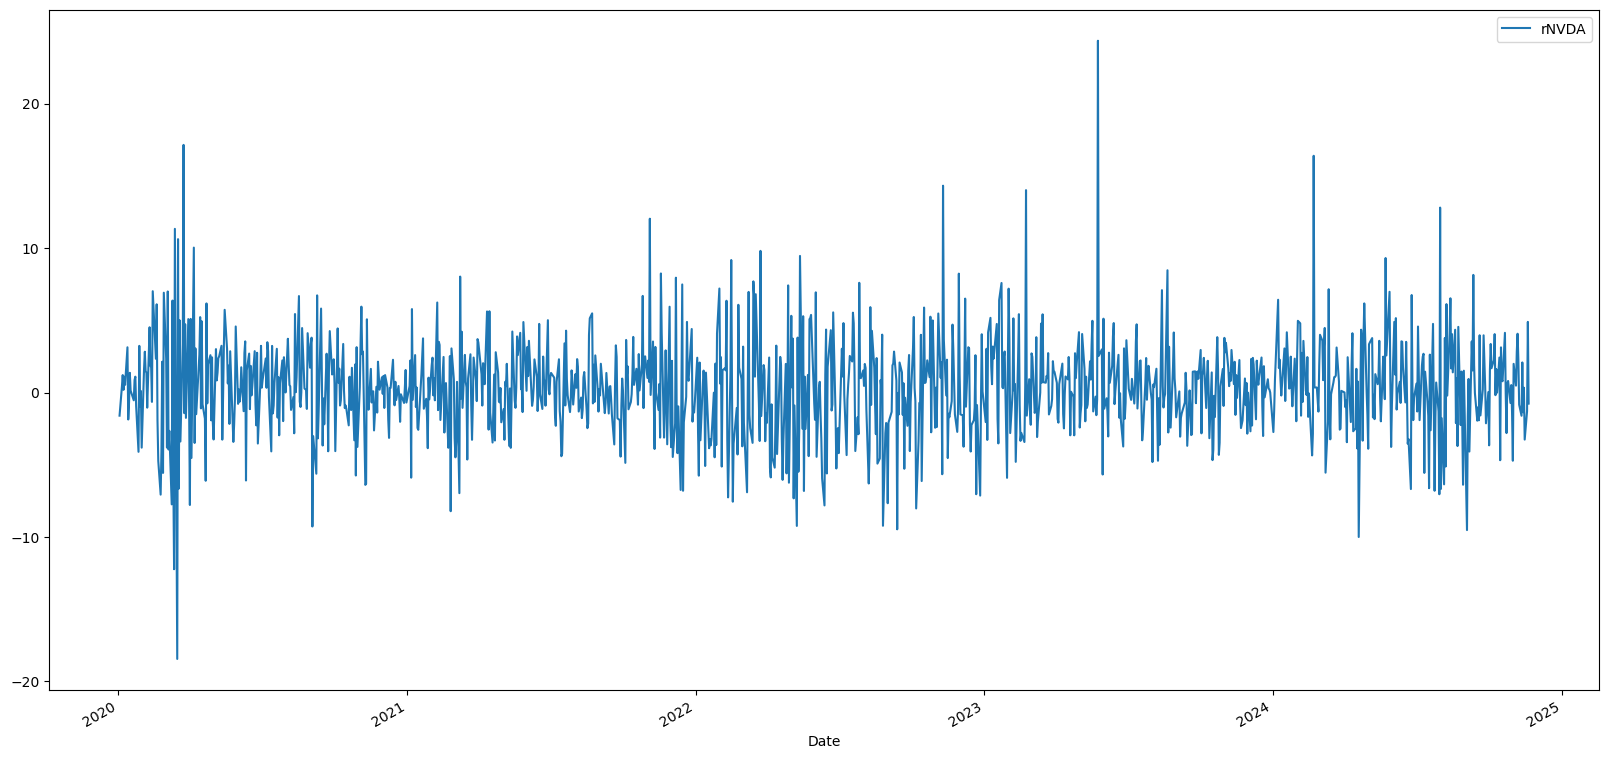

,Adj Close,rNVDA
Date,,
2020-01-03,5.877517,-1.600585
2020-01-06,5.902165,0.419356
2020-01-07,5.973620,1.210657
2020-01-08,5.984824,0.187562
2020-01-09,6.050554,1.098279


In [269]:
plt.rcParams['figure.figsize'] = (20,10)
douns_2[['rNVDA']].plot()
plt.show()
douns_2.head()

In [270]:
douns

,Adj Close
Date,
2020-01-02,5.973122
2020-01-03,5.877517
2020-01-06,5.902165
2020-01-07,5.973620
2020-01-08,5.984824
...,...
2024-11-14,146.759995
2024-11-15,141.979996
2024-11-18,140.149994


In [271]:
rNVDA = douns_2[['rNVDA']]
rNVDA.head()

,rNVDA
Date,
2020-01-03,-1.600585
2020-01-06,0.419356
2020-01-07,1.210657
2020-01-08,0.187562
2020-01-09,1.098279


In [272]:
adf_stat, pvaleur, crit, regres = adfuller(rNVDA, regression="n", regresults=True) # maxlag
pvaleur # => série stationnaire

2.5857424748462233e-18

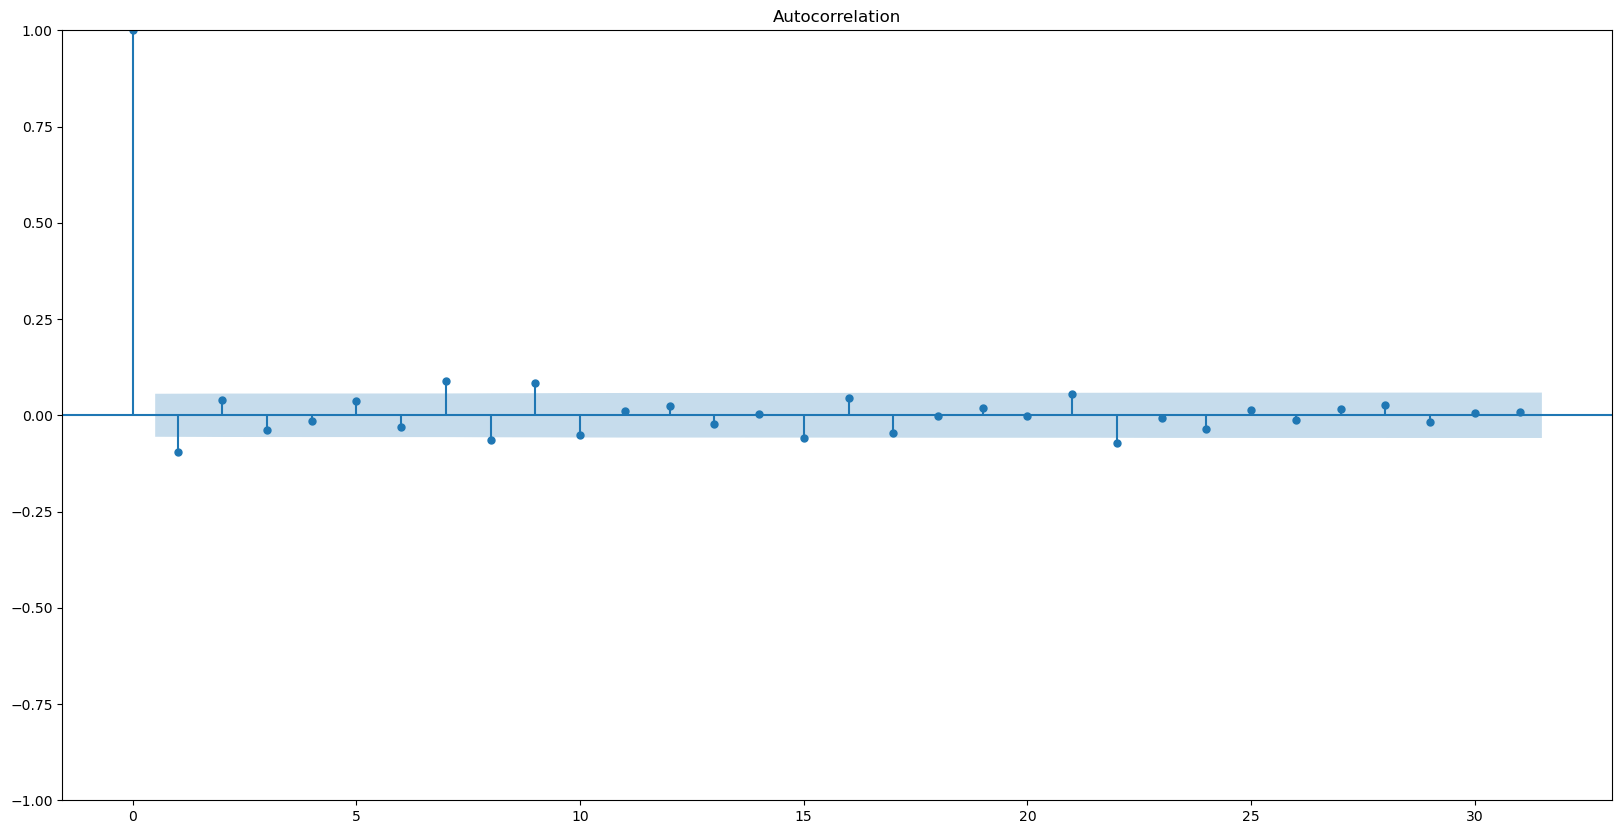

In [273]:
plot_acf(rNVDA,  alpha=.05)
plt.show()

In [274]:
coef_ac, confid_int = acf(rNVDA, nlags=10, alpha=.05)
coef_ac

array([ 1.        , -0.09666914,  0.040302  , -0.03901018, -0.01578498,
        0.03725286, -0.02957517,  0.08856513, -0.06307408,  0.08413085,
       -0.05181893])

In [275]:
confid_int

array([[ 1.        ,  1.        ],
       [-0.15255418, -0.04078411],
       [-0.01610286,  0.09670686],
       [-0.0955049 ,  0.01748455],
       [-0.07236376,  0.04079381],
       [-0.01933968,  0.0938454 ],
       [-0.08624425,  0.0270939 ],
       [ 0.03184787,  0.14528239],
       [-0.12022163, -0.00592654],
       [ 0.0267663 ,  0.1414954 ],
       [-0.10956755,  0.00592969]])

 donc AR1

In [276]:
for q, element in enumerate(coef_ac):
    if confid_int[q, 0] <= 0 <= confid_int[q, 1]:
        print(q-1)
        break

1


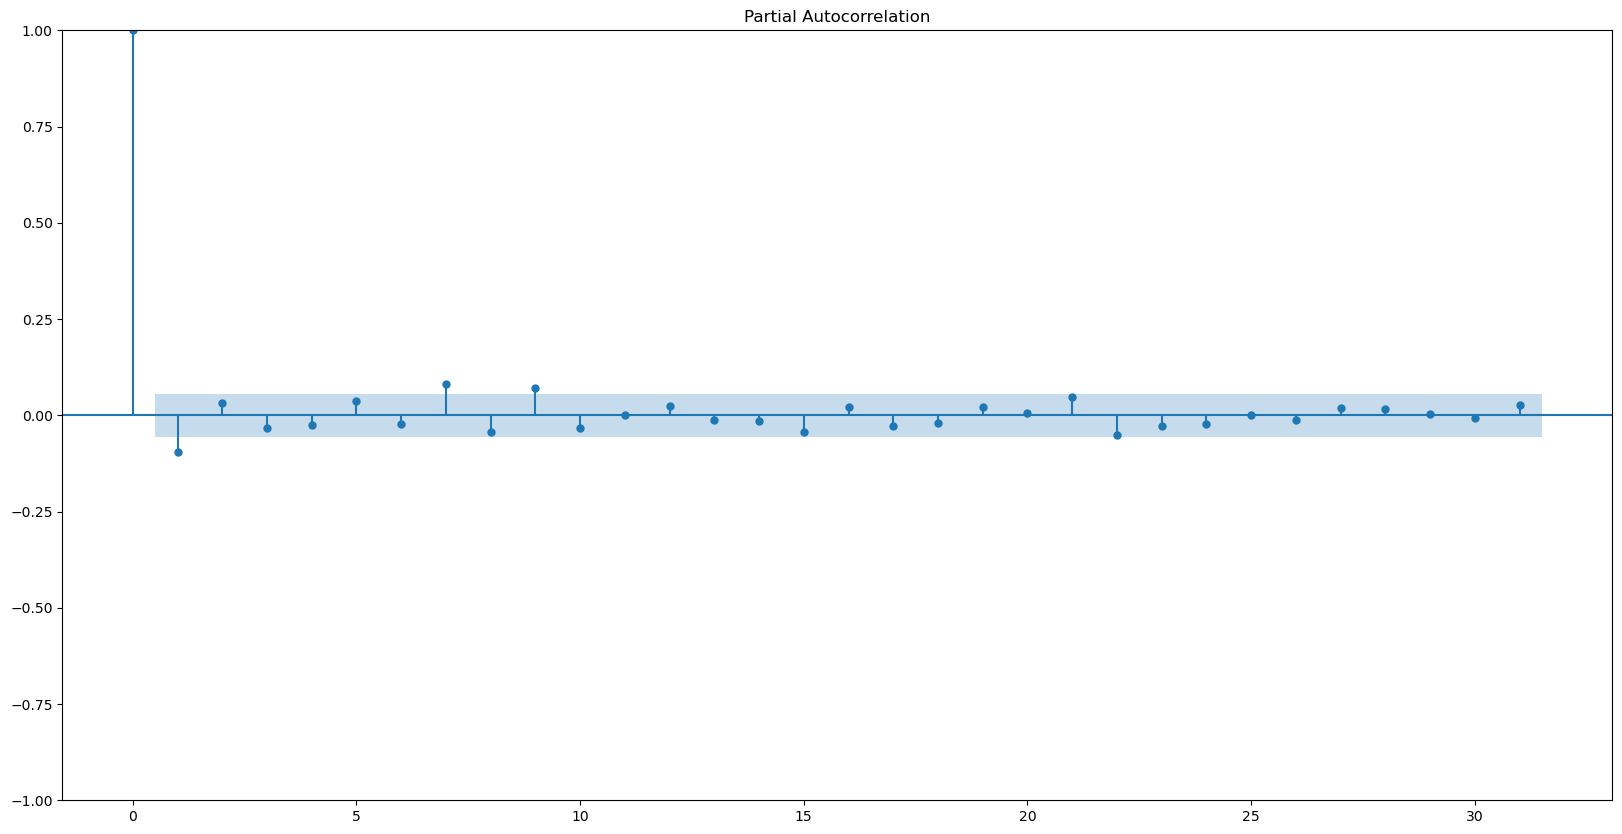

In [277]:
plot_pacf(rNVDA,  alpha=.05)
plt.show()

In [278]:
coef_pac, confid_int_pac = pacf(rNVDA, nlags=10, alpha=.05)

for p, element in enumerate(coef_pac):
    if confid_int_pac[p, 0] <= 0 <= confid_int_pac[p, 1]:
        print(p-1)
        break

1


Donc q = 1 et p = 1. On doit estimer les modèles suivant

- MA(1)
- AR(1)
- ARMA(1,1)

In [279]:
from statsmodels.tsa.arima.model import ARIMA

In [280]:
# Convertir la colonne de date et définir l'index
douns_2['date_column'] = pd.to_datetime(douns_2['date_column'])
douns_2.set_index('date_column', inplace=True)
douns_2 = douns_2.asfreq('D')  # Définir la fréquence

KeyError: 'date_column'

In [281]:
print(douns_2.columns)

Index(['Adj Close', 'rNVDA'], dtype='object')


In [282]:
douns_2[['rNVDA']] = rNVDA
result_dict = {}
for p in [0,1]:
    for q in [0,1]:
        if (p != 0 or q != 0):
            arma_mod = ARIMA(endog=douns_2[['rNVDA']].dropna(), order=(p,0, q))
            fitx = arma_mod.fit()
            result_dict["ARMA_%s%s" % (p, q)] = fitx

C:\Users\issak\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\issak\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\issak\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\issak\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

In [283]:
result_dict

{'ARMA_01': <statsmodels.tsa.arima.model.ARIMAResultsWrapper at 0x12256deb150>,
 'ARMA_10': <statsmodels.tsa.arima.model.ARIMAResultsWrapper at 0x12256e76e50>,
 'ARMA_11': <statsmodels.tsa.arima.model.ARIMAResultsWrapper at 0x12256e89bd0>}

In [284]:
result_dict['ARMA_01'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  rNVDA   No. Observations:                 1230
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -3250.276
Date:                Fri, 22 Nov 2024   AIC                           6506.552
Time:                        23:34:02   BIC                           6521.897
Sample:                             0   HQIC                          6512.325
                               - 1230                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3181      0.090      3.544      0.000       0.142       0.494
ma.L1         -0.0911      0.024     -3.729      0.000      -0.139      -0.043
sigma2        11.5550      0.283     40.799      0.000      11.000      12.110
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               756.84
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               0.98   Skew:                             0.37
Prob(H) (two-sided):                  0.87   Kurtosis:                         6.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [285]:
result_dict['ARMA_11'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  rNVDA   No. Observations:                 1230
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -3249.153
Date:                Fri, 22 Nov 2024   AIC                           6506.306
Time:                        23:34:02   BIC                           6526.765
Sample:                             0   HQIC                          6514.003
                               - 1230                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3182      0.093      3.416      0.001       0.136       0.501
ar.L1         -0.4052      0.215     -1.885      0.059      -0.827       0.016
ma.L1          0.3106      0.226      1.374      0.169      -0.133       0.754
sigma2        11.5339      0.287     40.198      0.000      10.971      12.096
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               776.38
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               0.99   Skew:                             0.40
Prob(H) (two-sided):                  0.94   Kurtosis:                         6.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [286]:
result_dict['ARMA_10'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  rNVDA   No. Observations:                 1230
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -3249.925
Date:                Fri, 22 Nov 2024   AIC                           6505.849
Time:                        23:34:03   BIC                           6521.194
Sample:                             0   HQIC                          6511.622
                               - 1230                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3181      0.090      3.547      0.000       0.142       0.494
ar.L1         -0.0966      0.023     -4.128      0.000      -0.142      -0.051
sigma2        11.5483      0.283     40.834      0.000      10.994      12.103
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               754.63
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               0.99   Skew:                             0.37
Prob(H) (two-sided):                  0.91   Kurtosis:                         6.76
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [287]:
pvs = result_dict['ARMA_01'].pvalues
pvs

const     0.000394
ma.L1     0.000192
sigma2    0.000000
dtype: float64

In [288]:
pvs = result_dict['ARMA_10'].pvalues
pvs

const     0.000390
ar.L1     0.000037
sigma2    0.000000
dtype: float64

In [289]:
pvs = result_dict['ARMA_11'].pvalues
pvs

const     0.000635
ar.L1     0.059496
ma.L1     0.169486
sigma2    0.000000
dtype: float64

In [290]:
def all_params_sign(pvs, seuil):
    for i, pv in enumerate(pvs):
        if pv > seuil:
            return False
    return True

In [291]:
all_params_sign(pvs, 0.05)

False

In [292]:
def which_is_unsign(pvs, seuil):
    res = []
    for i, pv in enumerate(pvs):
        if pv > seuil:
            res.append(pvs.index[i])
    return res

In [293]:
which_is_unsign(pvs, 0.001)

['ar.L1', 'ma.L1']

In [294]:
# probleme de significativité des coefficients
for k in result_dict.keys():
    pvs = result_dict[k].pvalues
    if not all_params_sign(pvs, 0.05):
        print(k, " => ", which_is_unsign(pvs, 0.05))

ARMA_11  =>  ['ar.L1', 'ma.L1']


On retire de la liste le modèle suivant ARMA(1,1)

In [295]:
result_dict.pop('ARMA_11', None)

In [296]:
result_dict

{'ARMA_01': <statsmodels.tsa.arima.model.ARIMAResultsWrapper at 0x12256deb150>,
 'ARMA_10': <statsmodels.tsa.arima.model.ARIMAResultsWrapper at 0x12256e76e50>}

In [315]:
douns_2 = douns_2['rNVDA']

KeyError: 'rNVDA'

In [316]:
def mape(y_estim, y):
    T = len(y)
    pct = (y - y_estim) / y
    return 100*(1/T)*sum(pct)

In [317]:
for k in result_dict.keys():
    result = result_dict[k]
    # ddof
    ddof = len(result.params)
    residuals = result.resid
    acorr = acorr_ljungbox(residuals, model_df=ddof, lags=10, return_df=False) 
    het = het_arch(residuals, nlags=10, ddof=ddof)
    
    aic = result.aic
    bic = result.bic
    
    rmsex = rmse(result.fittedvalues, douns_2)
    maex  = meanabs(result.fittedvalues, douns_2)
    mapex = mape(result.fittedvalues, douns_2)
    print("%s --- pval_ljung: %.4f      --- pval_arch: %.4f" %(k, acorr.iloc[-1,1], het[1]))
    print("        --- AIC:       %.4f   --- BIC:      %.4f" % (aic, bic))
    print("        --- RMSE:       %.6f    --- MAE:       %.6f      --- MAPE: %.6f" % (rmsex, maex, mapex))
    print("-------------------------------------------------------------------------------------------")


ARMA_01 --- pval_ljung: 0.0004      --- pval_arch: 0.0000
        --- AIC:       6506.5523   --- BIC:      6521.8966
        --- RMSE:       3.399268    --- MAE:       2.512080      --- MAPE: -inf
-------------------------------------------------------------------------------------------
ARMA_10 --- pval_ljung: 0.0008      --- pval_arch: 0.0000
        --- AIC:       6505.8493   --- BIC:      6521.1936
        --- RMSE:       3.398296    --- MAE:       2.512288      --- MAPE: -inf
-------------------------------------------------------------------------------------------


In [324]:
result_dict["ARMA_10"].forecast(steps=1, alpha=.05)

C:\Users\issak\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\issak\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\issak\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


1230    0.422399
dtype: float64

In [346]:
resultat = result_dict["ARMA_10"]
resultat.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  rNVDA   No. Observations:                 1230
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -3249.925
Date:                Sat, 23 Nov 2024   AIC                           6505.849
Time:                        00:06:59   BIC                           6521.194
Sample:                             0   HQIC                          6511.622
                               - 1230                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3181      0.090      3.547      0.000       0.142       0.494
ar.L1         -0.0966      0.023     -4.128      0.000      -0.142      -0.051
sigma2        11.5483      0.283     40.834      0.000      10.994      12.103
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               754.63
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               0.99   Skew:                             0.37
Prob(H) (two-sided):                  0.91   Kurtosis:                         6.76
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

C:\Users\issak\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['plot_insample']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
C:\Users\issak\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['plot_insample']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
C:\Users\issak\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['plot_insample']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


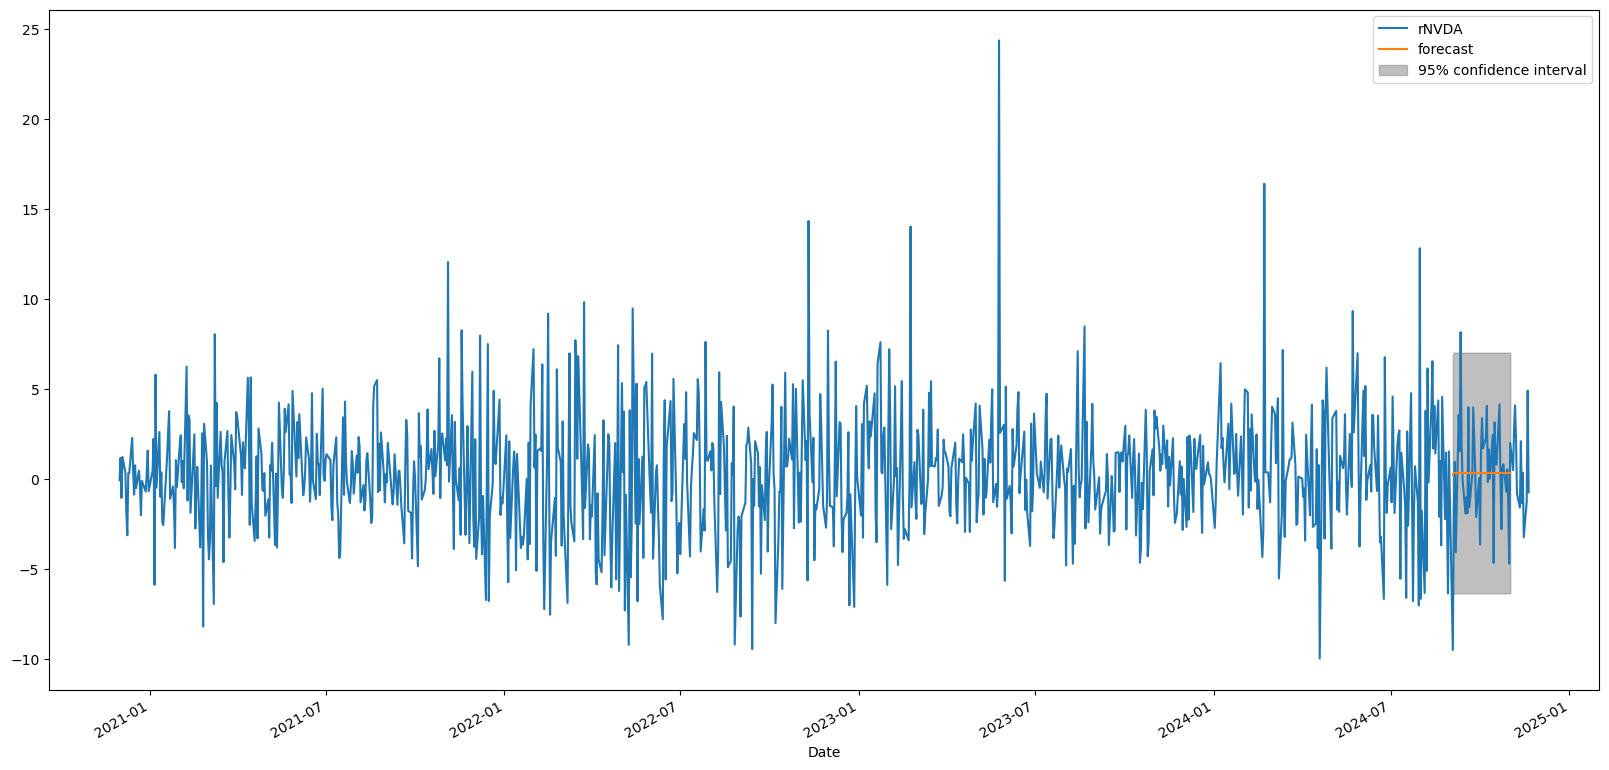

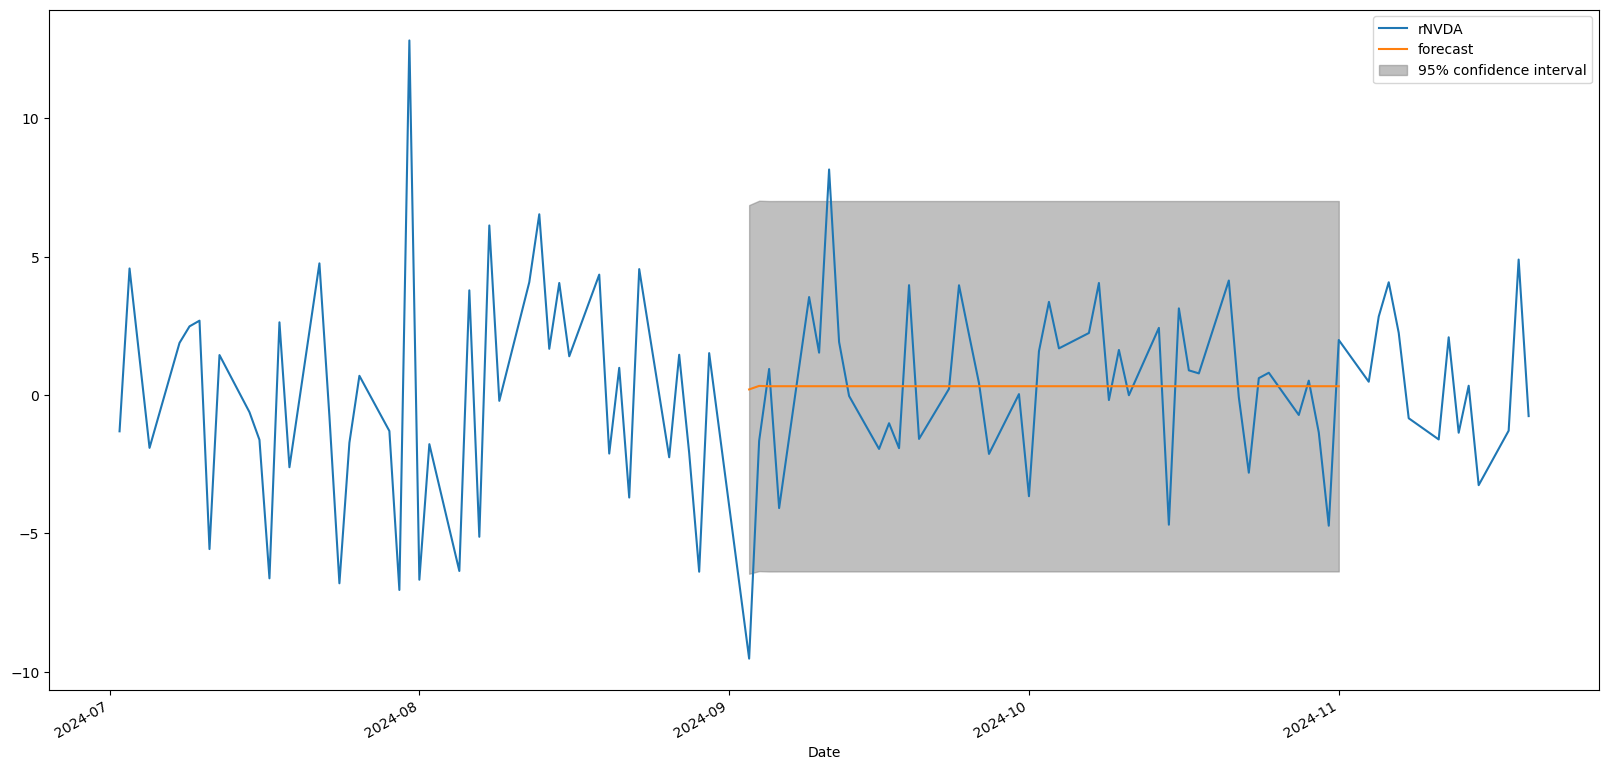

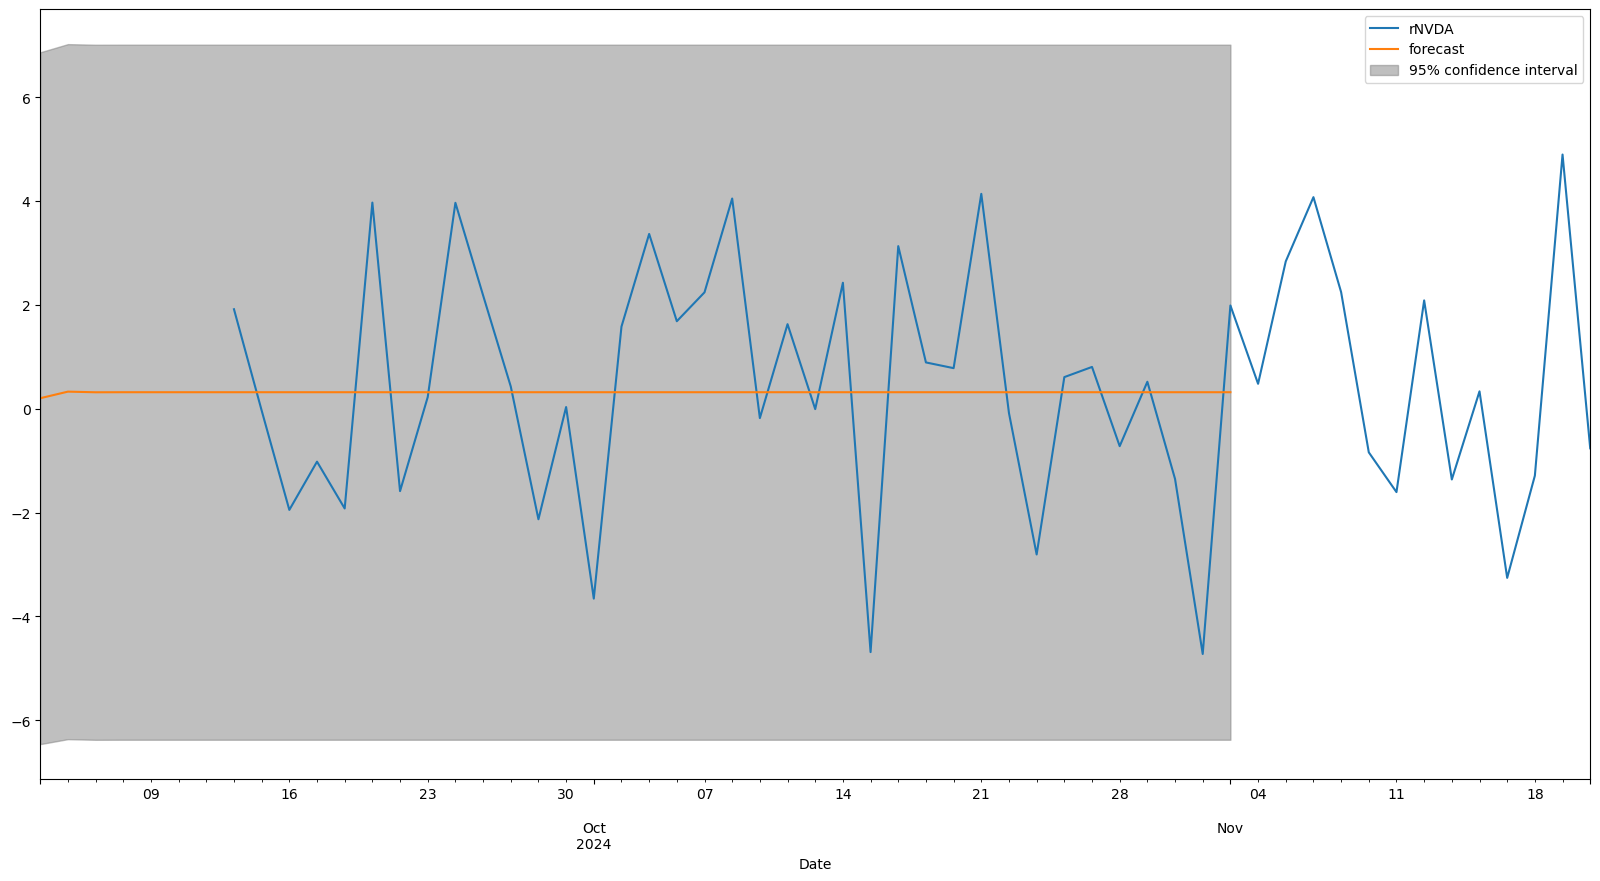

In [353]:
from statsmodels.graphics.tsaplots import plot_predict
fig, ax = plt.subplots()
ax = douns_2.iloc[-1000:].plot(ax=ax)
fig = plot_predict(resultat,"9-2024", "11-2024", dynamic=True, ax=ax,
                        plot_insample=False)
fig, ax = plt.subplots()
ax = douns_2.iloc[-100:].plot(ax=ax)
fig = plot_predict(resultat,"9-2024", "11-2024", dynamic=True, ax=ax,
                        plot_insample=False)

fig, ax = plt.subplots()
ax = douns_2.iloc[-50:].plot(ax=ax)
fig = plot_predict(resultat,"9-2024", "11-2024", dynamic=True, ax=ax,
                        plot_insample=False)